<a href="https://colab.research.google.com/github/divakar9819/Deep_Learning_implementation/blob/master/FeedforwardNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from  sklearn.datasets import make_moons , make_circles
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score , mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

** Generating Dataset **

In [15]:
data , labels = make_moons(n_samples=1000,random_state=0,noise=0.15)
print(data.shape , labels.shape)

(1000, 2) (1000,)


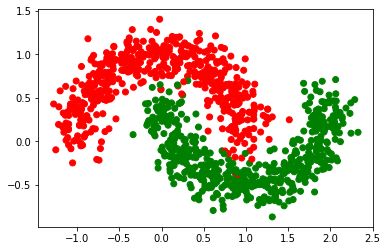

In [17]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

# Feedforward Neural Network Class

In [0]:
class FFSNNetwork:
  
  def __init__(self, n_inputs, hidden_sizes=[2]):
    self.nx = n_inputs
    self.ny = 1
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]
    
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.A = {}
    
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]
  
  def grad_sigmoid(self, x):
    return x*(1-x) 
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    if display_loss:
      loss = {}
    
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
        
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

In [0]:
ffnn = FFSNNetwork(2,[2,3])

In [0]:
x_train,x_val , y_train , y_val = train_test_split(data,labels,stratify=labels,random_state=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


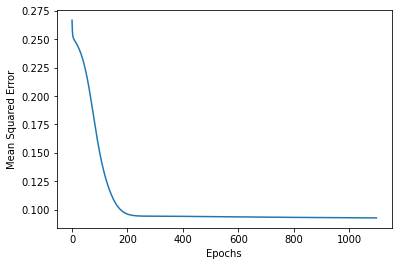

In [33]:
ffnn.fit(x_train,y_train , epochs=1100,learning_rate=0.002,display_loss=True)

In [35]:
Y_pred_train = ffnn.predict(x_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffnn.predict(x_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.86
Validation accuracy 0.91


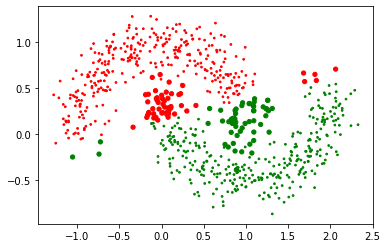

In [37]:
plt.scatter(x_train[:,0],x_train[:,1],cmap=my_cmap,c=Y_pred_binarised_train,s=15*(np.abs(Y_pred_binarised_train-y_train)+0.2))
plt.show()

In [0]:
ffnn = FFSNNetwork(2,[2,3,3,2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


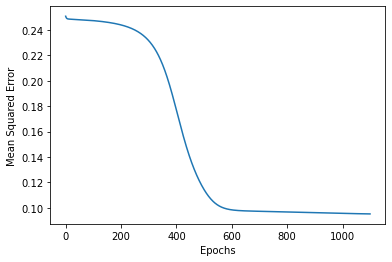

In [56]:
ffnn.fit(x_train,y_train , epochs=1100,learning_rate=0.001,display_loss=True)

In [57]:
Y_pred_train = ffnn.predict(x_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffnn.predict(x_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.86
Validation accuracy 0.91


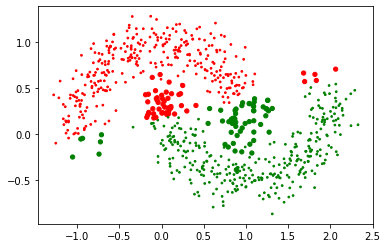

In [58]:
plt.scatter(x_train[:,0],x_train[:,1],cmap=my_cmap,c=Y_pred_binarised_train,s=15*(np.abs(Y_pred_binarised_train-y_train)+0.2))
plt.show()

In [0]:
data , labels = make_circles(n_samples=1000,random_state=0,noise=0.25,factor=0.3)

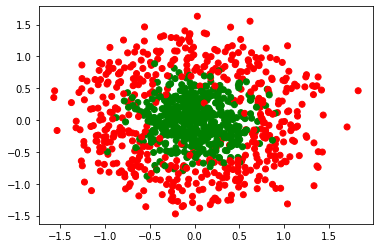

In [62]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
x_train , x_val ,y_train , y_val = train_test_split(data,labels,stratify=labels,random_state=1)

In [0]:
ffnn = FFSNNetwork(2,[3,4,2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


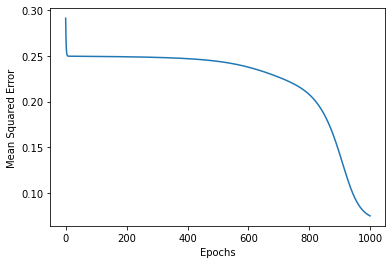

In [75]:
ffnn.fit(x_train,y_train , epochs=1000,learning_rate=0.002,display_loss=True)

In [76]:
Y_pred_train = ffnn.predict(x_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffnn.predict(x_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.91
Validation accuracy 0.9


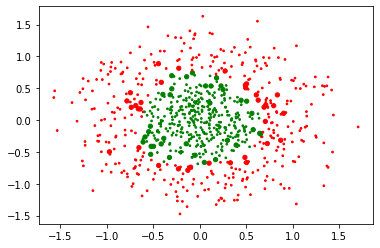

In [77]:
plt.scatter(x_train[:,0],x_train[:,1],cmap=my_cmap,c=Y_pred_binarised_train,s=15*(np.abs(Y_pred_binarised_train-y_train)+0.2))
plt.show()